In [2]:
import pandas as pd
from datetime import datetime    # Used to convert the "dob" column to a Pandas datetime data type.
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option("display.max_columns", None)

In [3]:
# When you have multiple sheets in excel Read all sheets into a dictionary of DataFrames
data = pd.read_excel("KPMG.xlsx", sheet_name=None, header=1)

# `all_data` is a dictionary where keys are sheet names, and values are DataFrames
# Access each DataFrame by sheet name
Transactions = data["Transactions"]  # Replace "Sheet1" with the actual sheet name
NewCustomerList = data["NewCustomerList"]  # Replace "Sheet2" with the actual sheet name
CustomerDemographic = data["CustomerDemographic"]  # Replace "Sheet3" with the actual sheet name
CustomerAddress = data["CustomerAddress"]  # Replace "Sheet4" with the actual sheet name
CustomerDemographic = CustomerDemographic.drop(columns=['default']) ##Delete the noisy default field

# Replace "Victoria" with "VIC" in the "state" column
CustomerAddress["state"] = CustomerAddress["state"].replace("Victoria", "VIC")
CustomerAddress["state"] = CustomerAddress["state"].replace("New South Wales", "NSW")
#CustomerDemographic

C:\Users\maryk\AppData\Local\Temp\ipykernel_14276\478349493.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  data = pd.read_excel("KPMG.xlsx", sheet_name=None, header=1)
C:\Users\maryk\AppData\Local\Temp\ipykernel_14276\478349493.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  data = pd.read_excel("KPMG.xlsx", sheet_name=None, header=1)


In [50]:
#Check if there are null or missing values in all the datasets 
Transactions.isna().sum()
NewCustomerList.isna().sum()
CustomerAddress.isna().sum()
CustomerDemographic.isna().sum()
#CustomerDemographic.shape

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
margin_gain                197
month                        0
dtype: int64

In [11]:
# Merge the two DataFrames based on the "customer_id" column
merged_demographic_Address = pd.merge(CustomerDemographic,      ##inner join
                                      CustomerAddress, on="customer_id")
merged_demographic_Address.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              504
job_industry_category                  655
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64

In [14]:
# Assuming you have a DataFrame named "merged_demographic_Address" with a "DOB" column
# Convert the "DOB" column to a Pandas datetime data type
merged_demographic_Address["DOB"] = pd.to_datetime(merged_demographic_Address["DOB"])

# Calculate the current date
current_date = datetime.now()

# Calculate the age by subtracting "dob" from the current date and extracting years
merged_demographic_Address["age"] = (current_date - merged_demographic_Address["DOB"]).astype('<m8[Y]')
merged_demographic_Address
# The resulting DataFrame now contains an "age" column

# Calculate the age by subtracting "dob" from the current date and extracting years
Transactions["margin_gain"] = (Transactions["list_price"] - Transactions["standard_cost"])
#Transactions

In [16]:
#Describes the Numerical values in the datasets
NewCustomerList.describe()
Transactions.describe()
merged_demographic_Address.describe()
#NewCustomerList.isna().sum()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,age
count,3996.000000,3996.000000,3909.000000,3996.000000,3996.000000,3909.000000
mean,2002.487988,48.880881,10.655922,2985.735485,7.514014,45.809158
std,1153.710903,28.724636,5.658533,844.945641,2.825426,12.622964
min,1.000000,0.000000,1.000000,2000.000000,1.000000,21.000000
25%,1003.750000,24.000000,6.000000,2200.000000,6.000000,36.000000
50%,2002.500000,48.000000,11.000000,2768.000000,8.000000,46.000000
75%,3001.250000,73.000000,15.000000,3750.000000,10.000000,55.000000
max,4000.000000,99.000000,22.000000,4883.000000,12.000000,92.000000


array([[<Axes: title={'center': 'transaction_id'}>,
        <Axes: title={'center': 'product_id'}>,
        <Axes: title={'center': 'customer_id'}>],
       [<Axes: title={'center': 'transaction_date'}>,
        <Axes: title={'center': 'online_order'}>,
        <Axes: title={'center': 'list_price'}>],
       [<Axes: title={'center': 'standard_cost'}>,
        <Axes: title={'center': 'product_first_sold_date'}>,
        <Axes: title={'center': 'margin_gain'}>]], dtype=object)

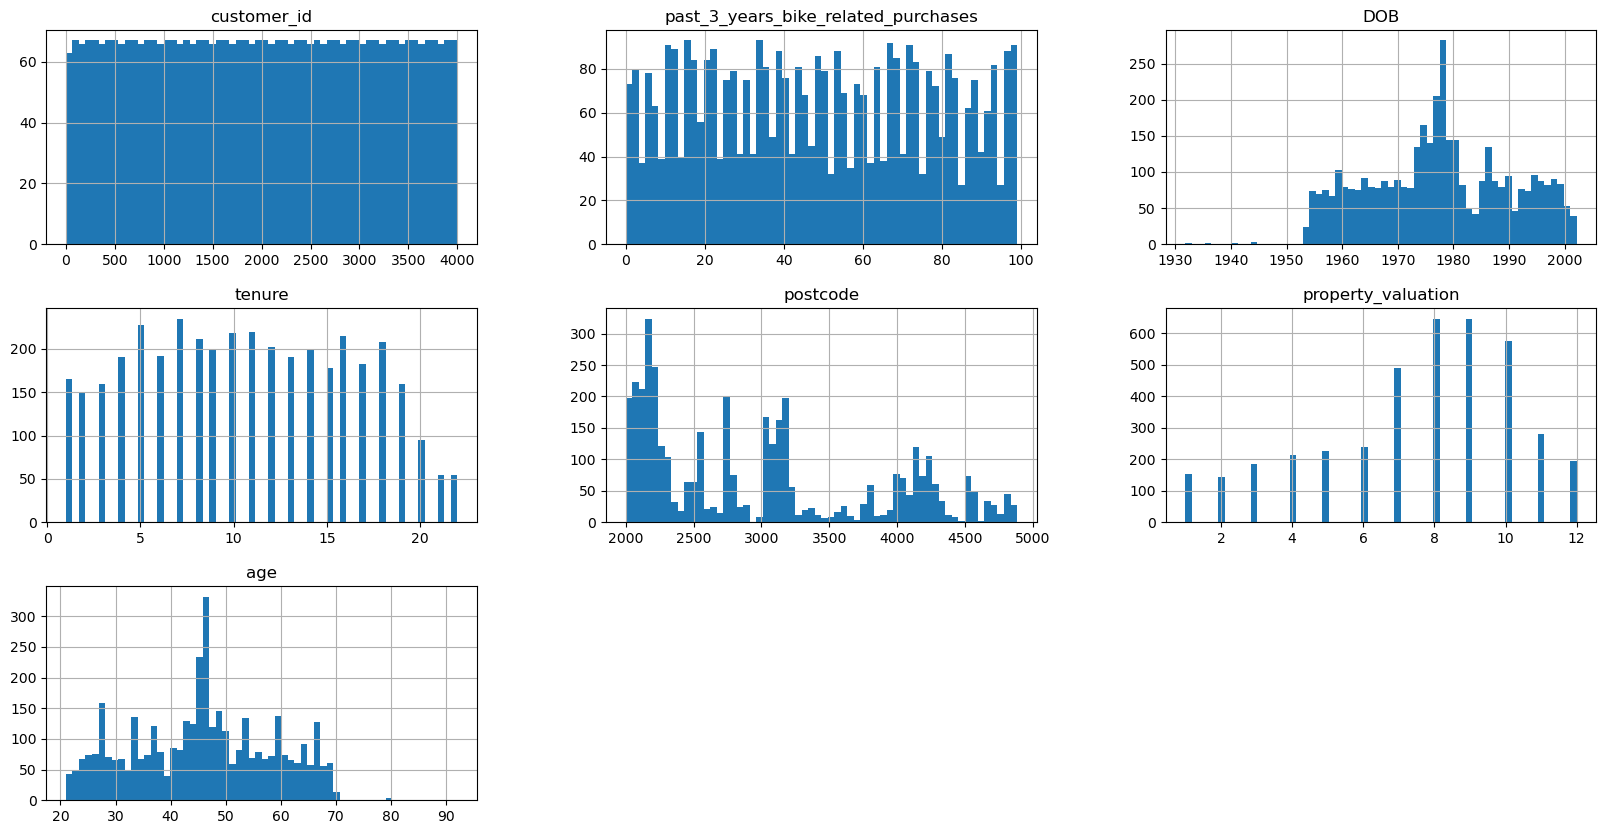

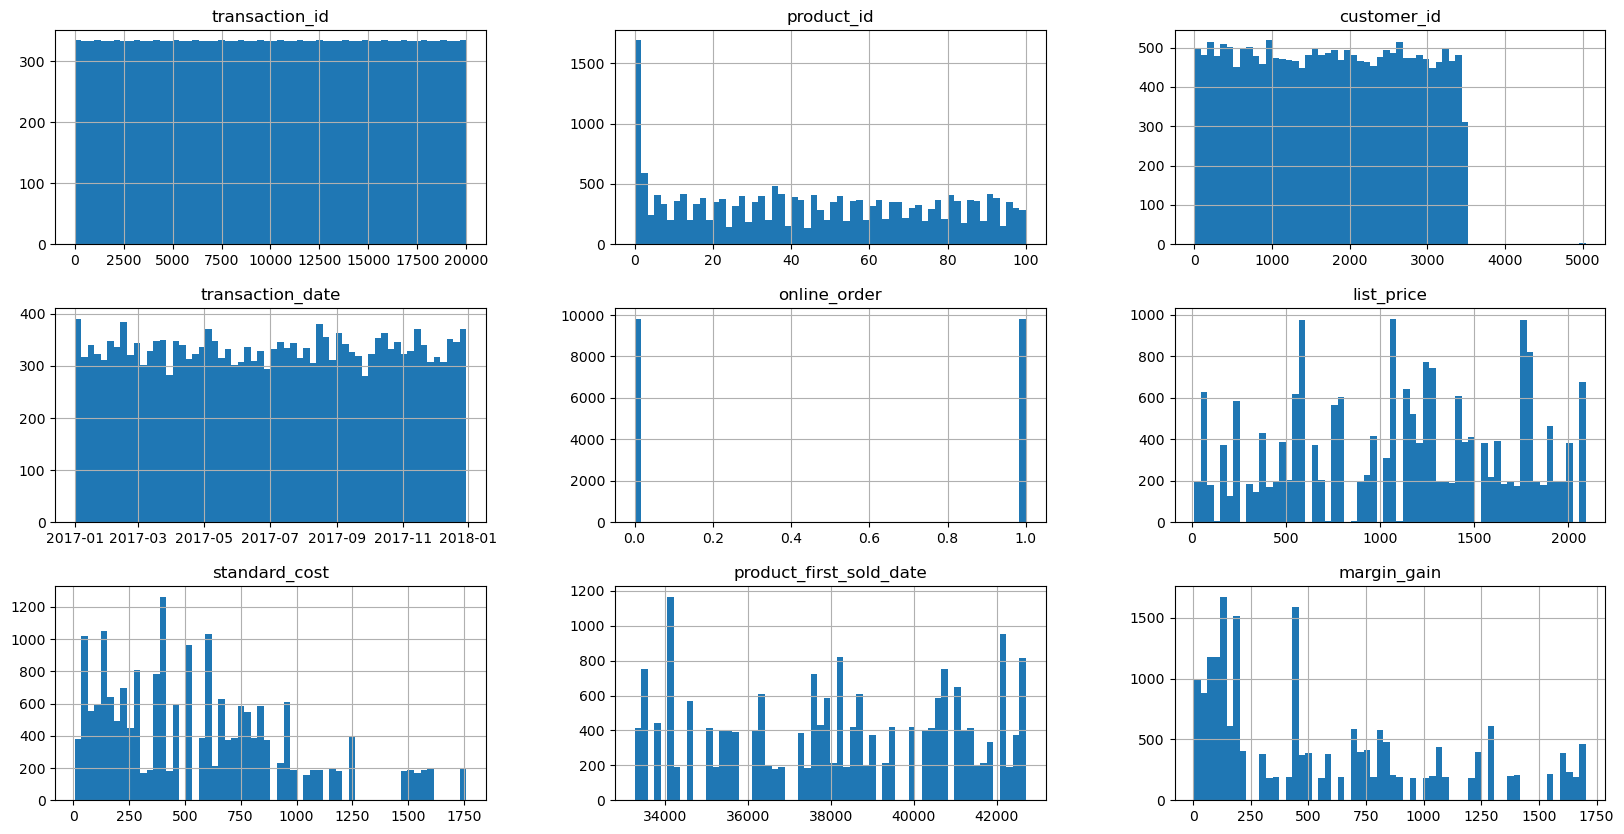

In [18]:
#Plot an Histogram of all the numerical fields for the merged dataset
merged_demographic_Address.hist(bins=60, figsize=(20,10))
Transactions.hist(bins=60, figsize=(20,10))

In [19]:
#Visualise how many customers have extreme values e.g age based on the histogram visuals
extreme_age_values = merged_demographic_Address[merged_demographic_Address["age"]>70]
id_notInTransation_values = Transactions[Transactions["customer_id"]>3499]
id_notInTransation_values

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margin_gain
2462,2463,2,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,41245.0,17.870000
6308,6309,69,3500,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.680000,33879.0,198.220000
8415,8416,74,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.910000,36668.0,827.160000
8561,8562,33,3500,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.180000,33888.0,144.260000
8707,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,42218.0,104.244984
14869,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.260000,34165.0,15.080000
16700,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,35667.0,90.100012
17468,17469,0,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,33879.0,75.139976
19835,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.900000,38750.0,583.270000


Female    2037
Male      1871
U           88
Name: gender, dtype: int64

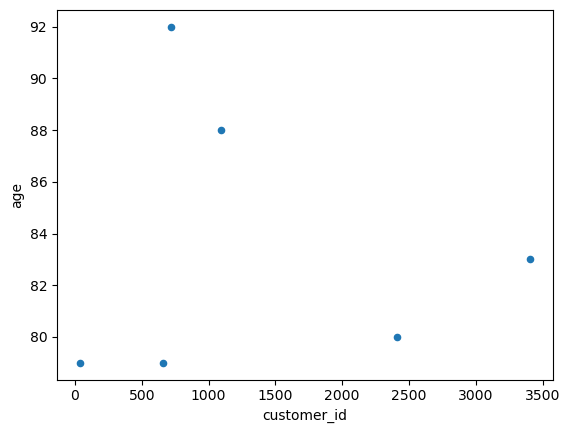

In [20]:
extreme_age_values[["customer_id", "age"]].plot(kind="scatter", x="customer_id", y="age") 
Transactions["customer_id"].value_counts()
merged_demographic_Address["gender"].value_counts()


#### EXPLORATORY DATA ANALYSIS
##### What's the overall margin gain/sales trends

In [21]:
Transactions['transaction_date'] = pd.to_datetime(Transactions['transaction_date'])
Transactions['month'] = Transactions['transaction_date'].dt.month
Transactions["month"].min()

1

In [22]:
monthly_margin= Transactions.groupby("month").sum()["margin_gain"].reset_index()

# Step 1: Calculate the total margin gain
total_monthly_gain = monthly_margin["margin_gain"].sum()

# Step 2: Calculate the percentage of margin gain for each age group
monthly_margin["monthly_gain_percentage"] = (monthly_margin["margin_gain"] / total_monthly_gain) * 100
#monthly_margin


C:\Users\maryk\AppData\Local\Temp\ipykernel_14276\3867091126.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_margin= Transactions.groupby("month").sum()["margin_gain"].reset_index()


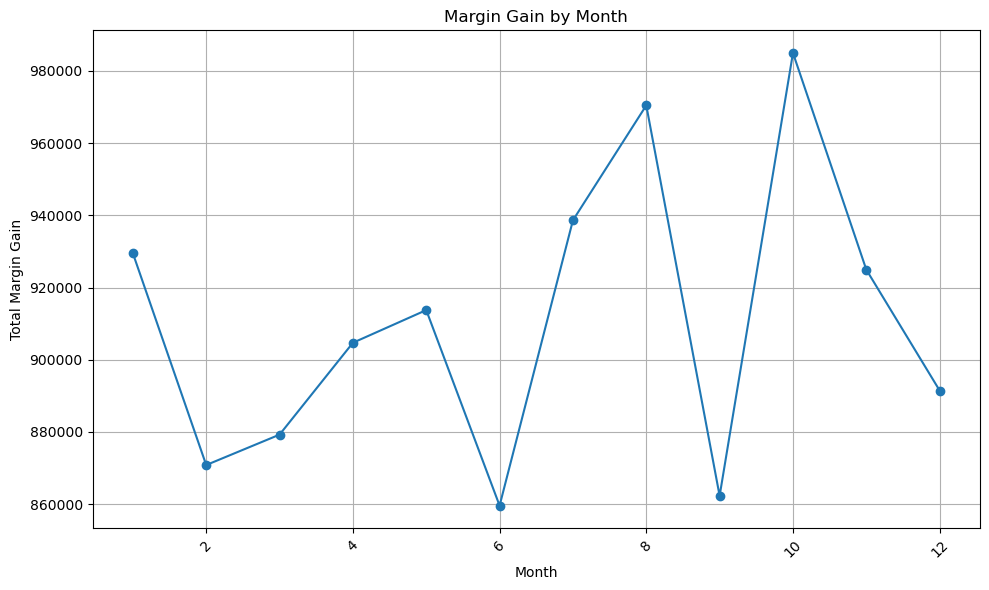

In [23]:

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_margin["month"], monthly_margin["margin_gain"], marker='o', linestyle='-')
plt.title('Margin Gain by Month')
plt.xlabel('Month')
plt.ylabel('Total Margin Gain')
plt.xticks(rotation=45)
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()


In [35]:
#Calculate total gains company made from each individual customer
approved_trans = Transactions[Transactions["order_status"]=="Approved"]
customer_margin = approved_trans.groupby("customer_id").sum()["margin_gain"].reset_index()
customer_margin
#approved_trans.isna().sum()
#Transactions.isna().sum()

C:\Users\maryk\AppData\Local\Temp\ipykernel_14276\4046696316.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_margin = approved_trans.groupby("customer_id").sum()["margin_gain"].reset_index()


,customer_id,margin_gain
0,1,3018.090000
1,2,2226.260000
2,3,3362.810000
3,4,220.570000
4,5,2394.940000
...,...,...
3488,3497,1648.320000
3489,3498,3147.330000
3490,3499,4955.250000
3491,3500,1785.860000


In [36]:
#Max and min gain
customer_margin["margin_gain"].min()
customer_margin["margin_gain"].max()
customer_margin["margin_gain"].mean()

3100.917273109619

In [51]:
#### Merge all three datasets Transtions, customer demographics and address based on Margin_gain
merged_all_datasets = pd.merge(merged_demographic_Address, ##inner join
                                      customer_margin, on="customer_id")

merged_all_datasets = merged_all_datasets[merged_all_datasets["age"].notna()]
#merged_all_datasets
merged_all_datasets.shape
#merged_all_datasets.isna().sum()

# Assuming 'merged_all_datasets.xlsx' as the file name
#excel_file_path = 'C:/Users/maryk/Videos/Documents/CW1 60012/Data Analysis/merged_all_datasets.xlsx'  # Replace 'path_to_save' with the desired path

# Save to Excel
#merged_all_datasets.to_excel(excel_file_path, index=False)


In [44]:
# Define the age bins and labels
bins = [0, 30, 40, 50, 60, 70, 80, float('inf')]  # Specify the age bins and include an upper bound
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']  # Specify the labels for each bin

# Use the cut function to create age groups
merged_all_datasets['age_group'] = pd.cut(merged_all_datasets['age'], bins=bins, labels=labels, right=False)

#age_margin = merged_all_datasets.groupby("age").sum()["margin_gain"].reset_index()
age_margin = merged_all_datasets.groupby("age_group").sum()["margin_gain"].reset_index()


# Step 1: Calculate the total margin gain
total_margin_gain = age_margin["margin_gain"].sum()

# Step 2: Calculate the percentage of margin gain for each age group
age_margin["margin_gain_percentage"] = (age_margin["margin_gain"] / total_margin_gain) * 100
#age_margin
# The "margin_gain_percentage" column now contains the percentage of margin gain for each age group

C:\Users\maryk\AppData\Local\Temp\ipykernel_14276\1663996451.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_margin = merged_all_datasets.groupby("age_group").sum()["margin_gain"].reset_index()


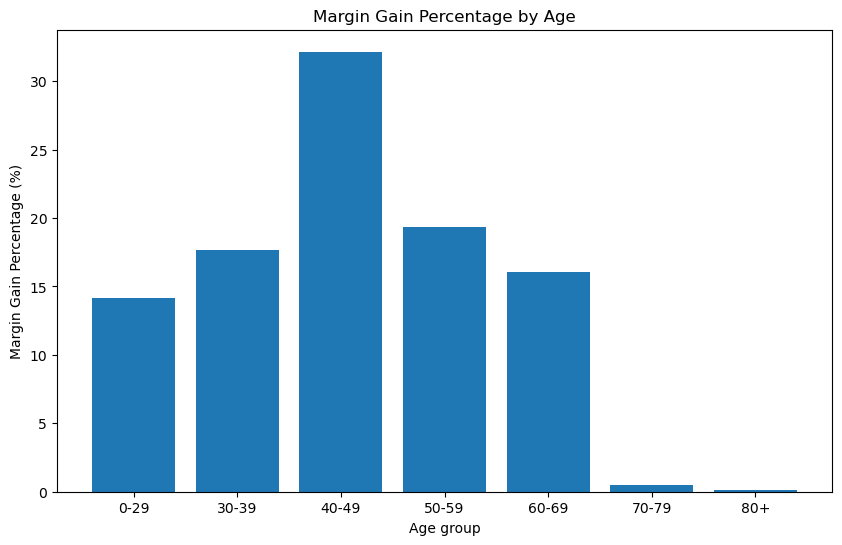

In [45]:
# Plot margin_gain_percentage against age
plt.figure(figsize=(10, 6))
plt.bar(age_margin["age_group"], age_margin["margin_gain_percentage"])
plt.xlabel("Age group")
plt.ylabel("Margin Gain Percentage (%)")
plt.title("Margin Gain Percentage by Age")
plt.xticks(age_margin["age_group"])
plt.show()

C:\Users\maryk\AppData\Local\Temp\ipykernel_14276\964717343.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  industry_margin = merged_all_datasets.groupby("job_industry_category").sum()["margin_gain"].reset_index()


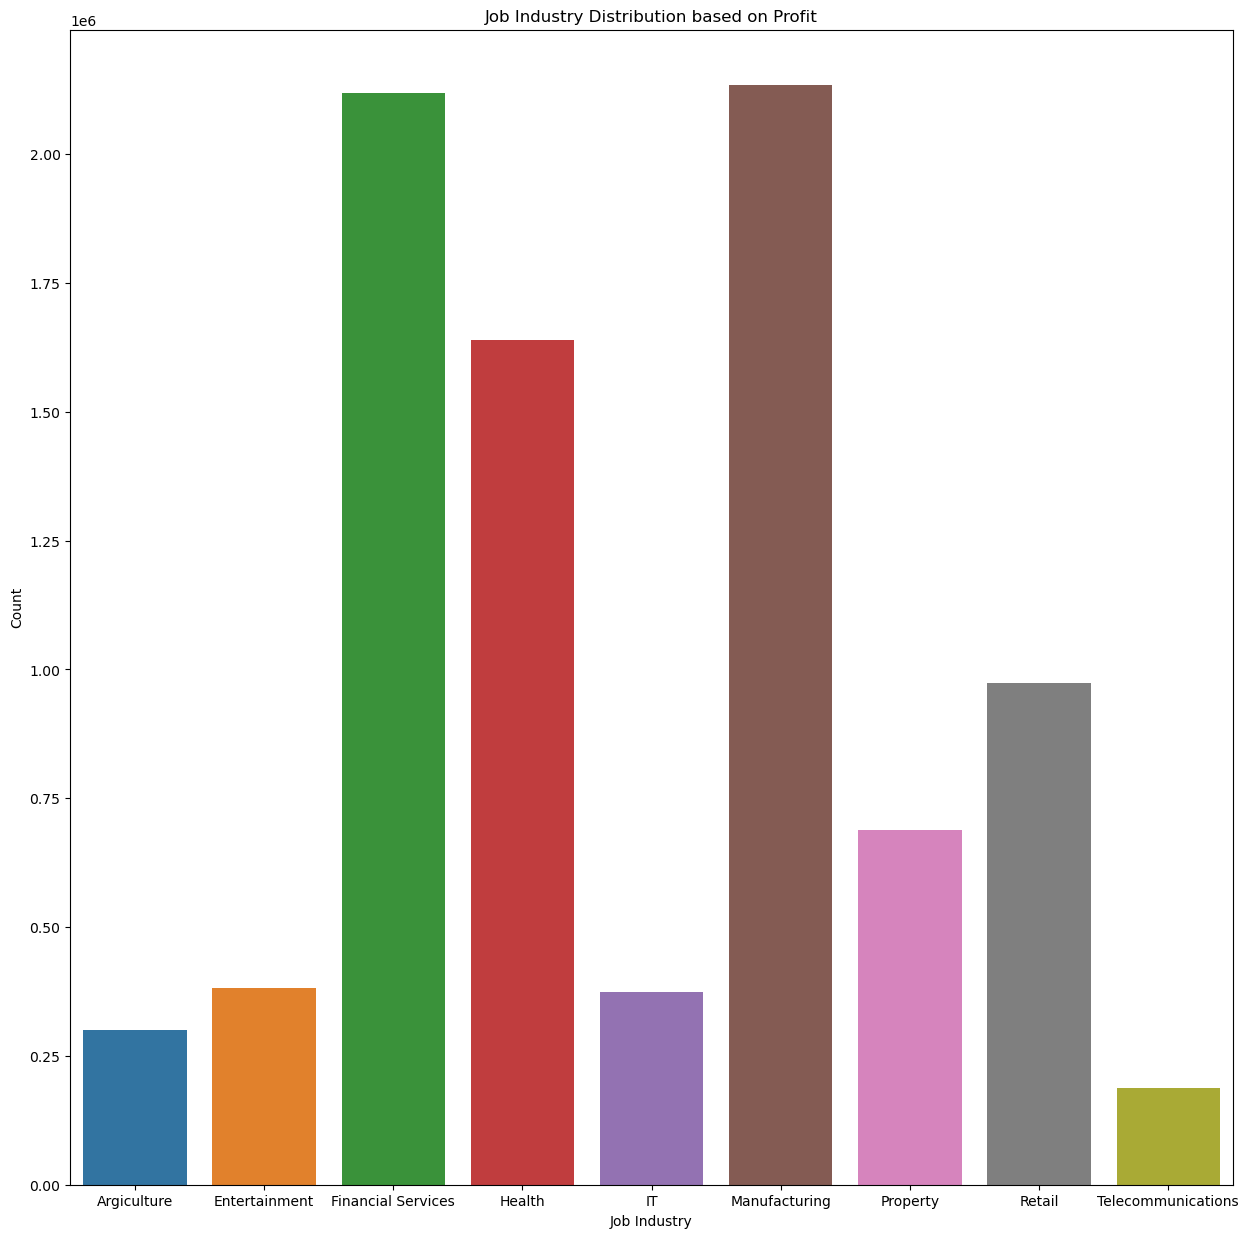

In [46]:
#age_margin = merged_all_datasets.groupby("age").sum()["margin_gain"].reset_index()
industry_margin = merged_all_datasets.groupby("job_industry_category").sum()["margin_gain"].reset_index()
industry_margin

plt.figure(figsize=(15, 15))
sns.barplot(x=industry_margin["job_industry_category"], y=industry_margin["margin_gain"])
plt.xlabel("Job Industry")
plt.ylabel("Count")
plt.title("Job Industry Distribution based on Profit")
plt.show()



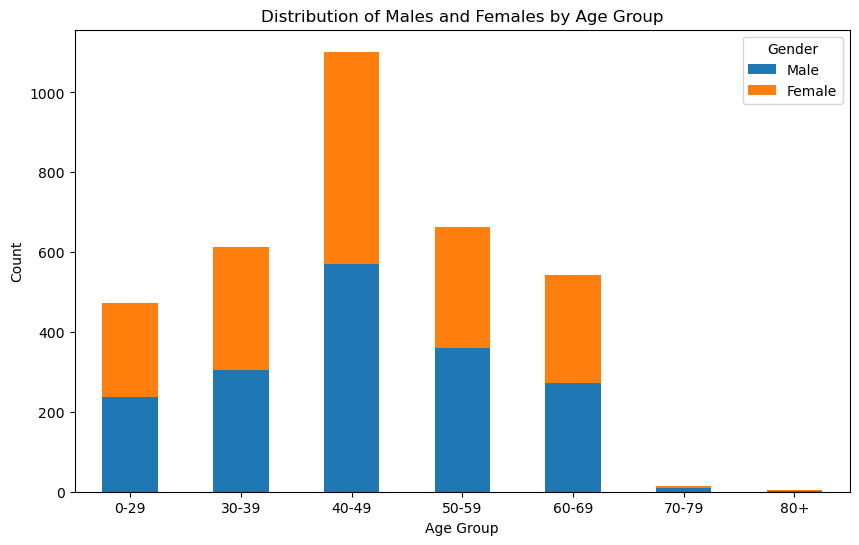

In [152]:
# Create a count column with a value of 1 for each individual
merged_all_datasets['count'] = 1

# Pivot the data to prepare it for plotting
pivot_data = merged_all_datasets.pivot_table(index='age_group', columns='gender', values='count', aggfunc='sum', fill_value=0)

# Create a stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title("Distribution of Males and Females by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the chart
plt.show()

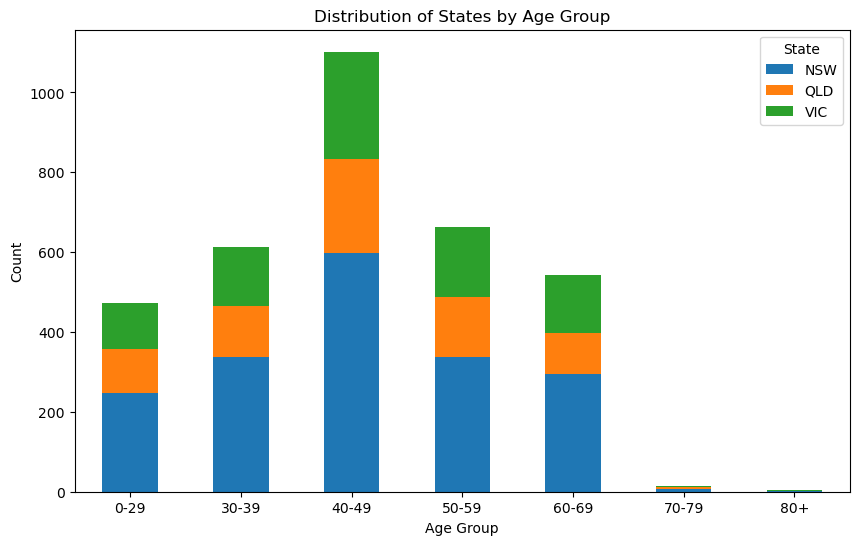

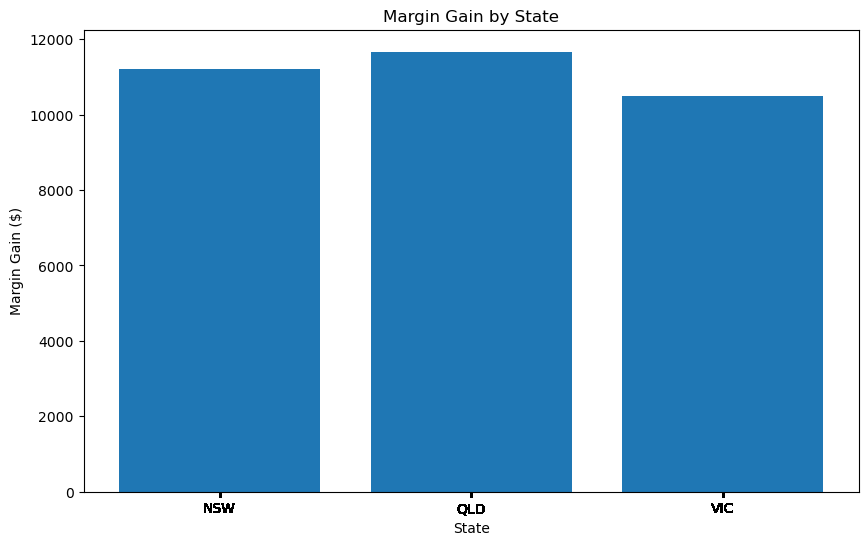

In [157]:
# Create a count column with a value of 1 for each individual
merged_all_datasets['count1'] = 1

# Pivot the data to prepare it for plotting
pivot_data1 = merged_all_datasets.pivot_table(index='age_group', columns='state', values='count1', aggfunc='sum', fill_value=0)

# Create a stacked bar chart
ax = pivot_data1.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title("Distribution of States by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="State", labels=["NSW", "QLD", "VIC"])
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the chart
plt.show()

# Plot margin_gain_percentage against age
plt.figure(figsize=(10, 6))
plt.bar(merged_all_datasets["state"], merged_all_datasets["margin_gain"])
plt.xlabel("State")
plt.ylabel("Margin Gain ($)")
plt.title("Margin Gain by State")
plt.xticks(merged_all_datasets["state"])
plt.show()

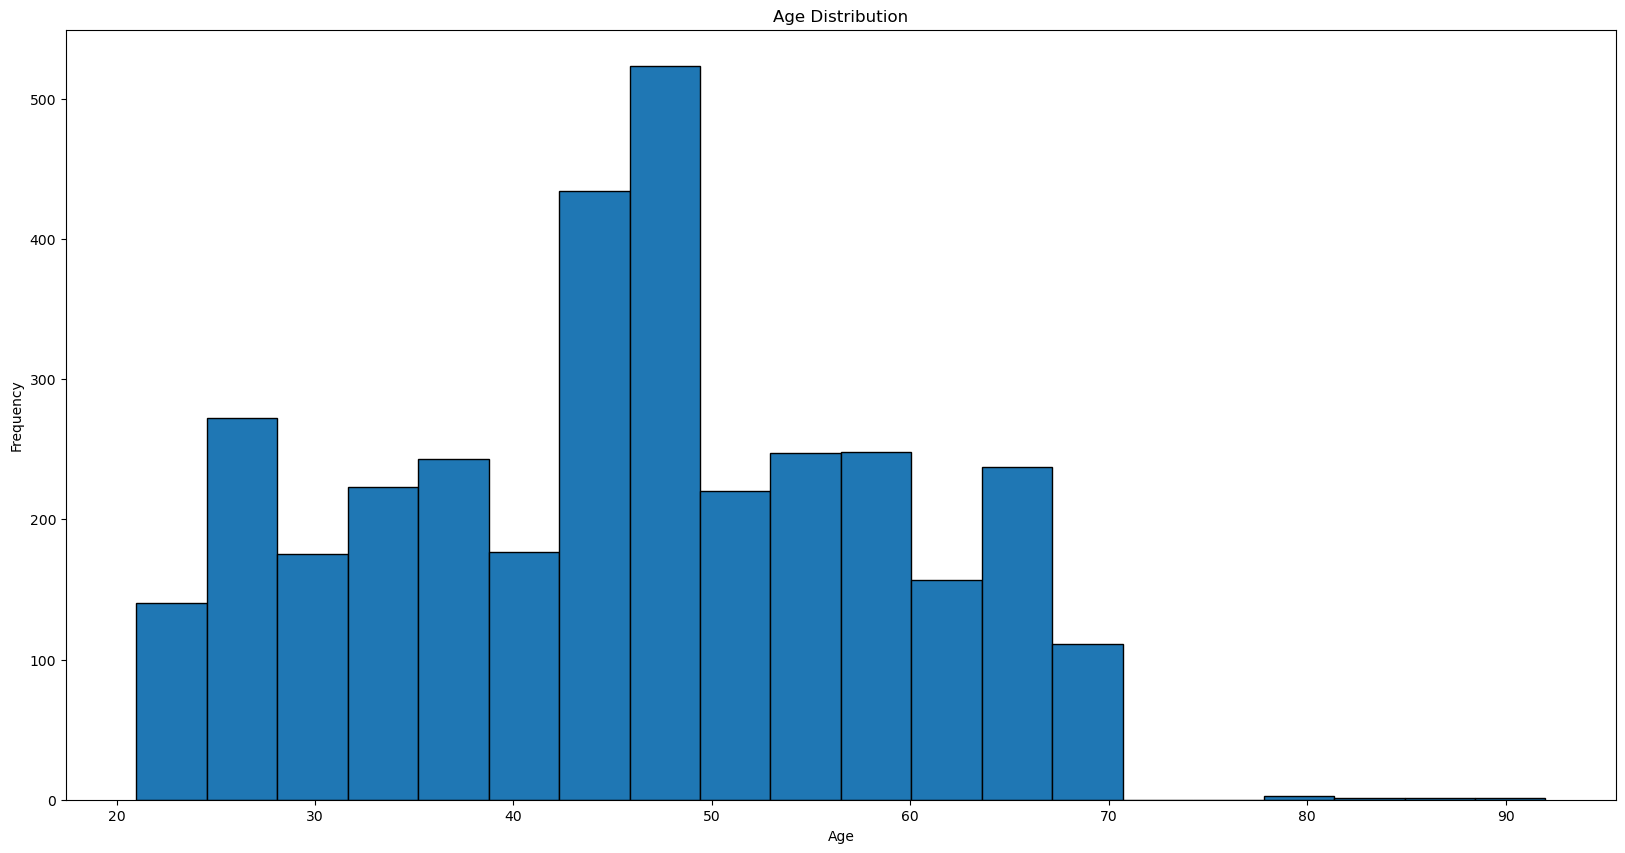

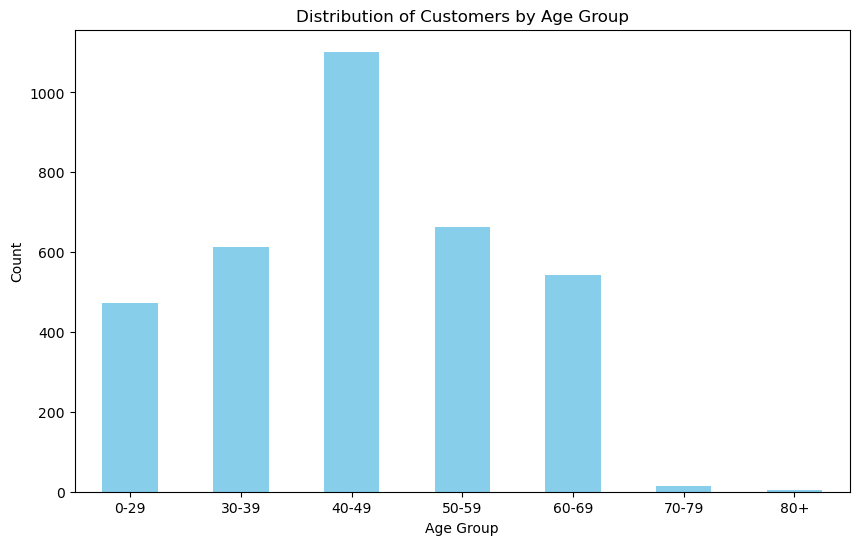

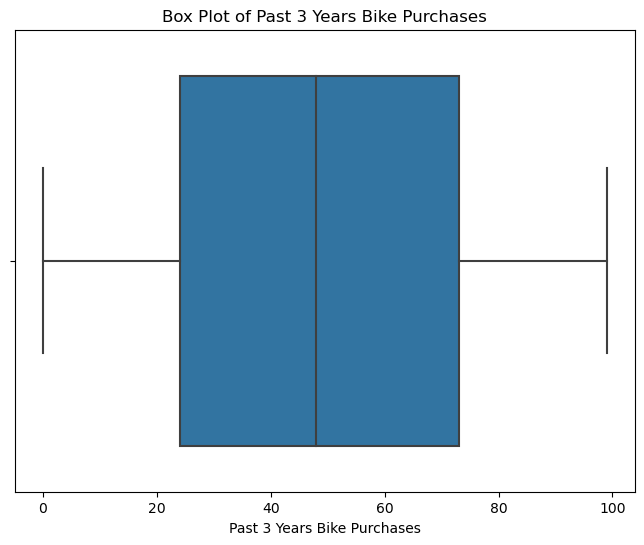

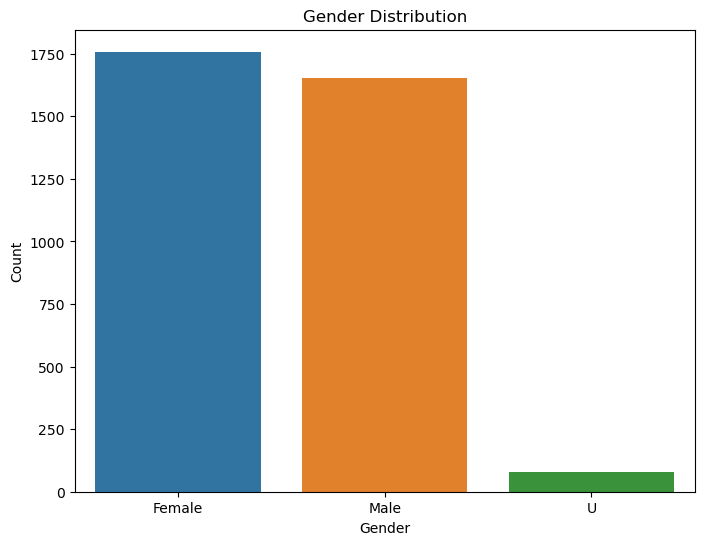

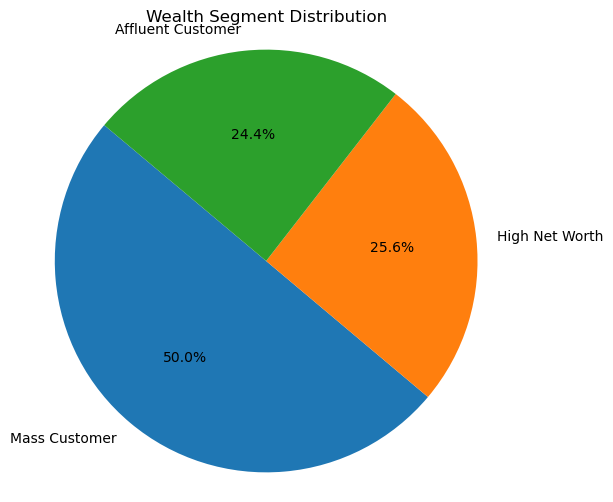

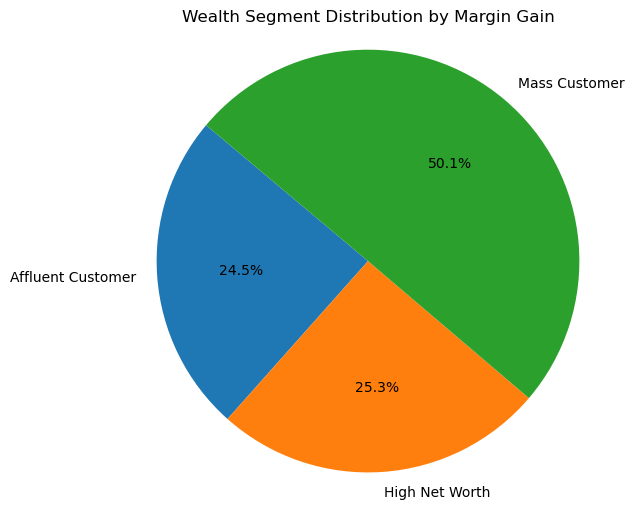

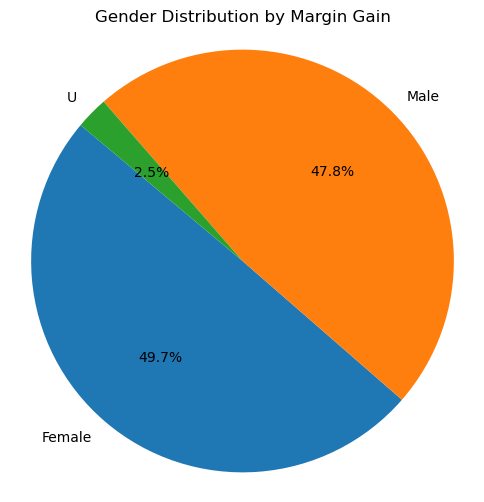

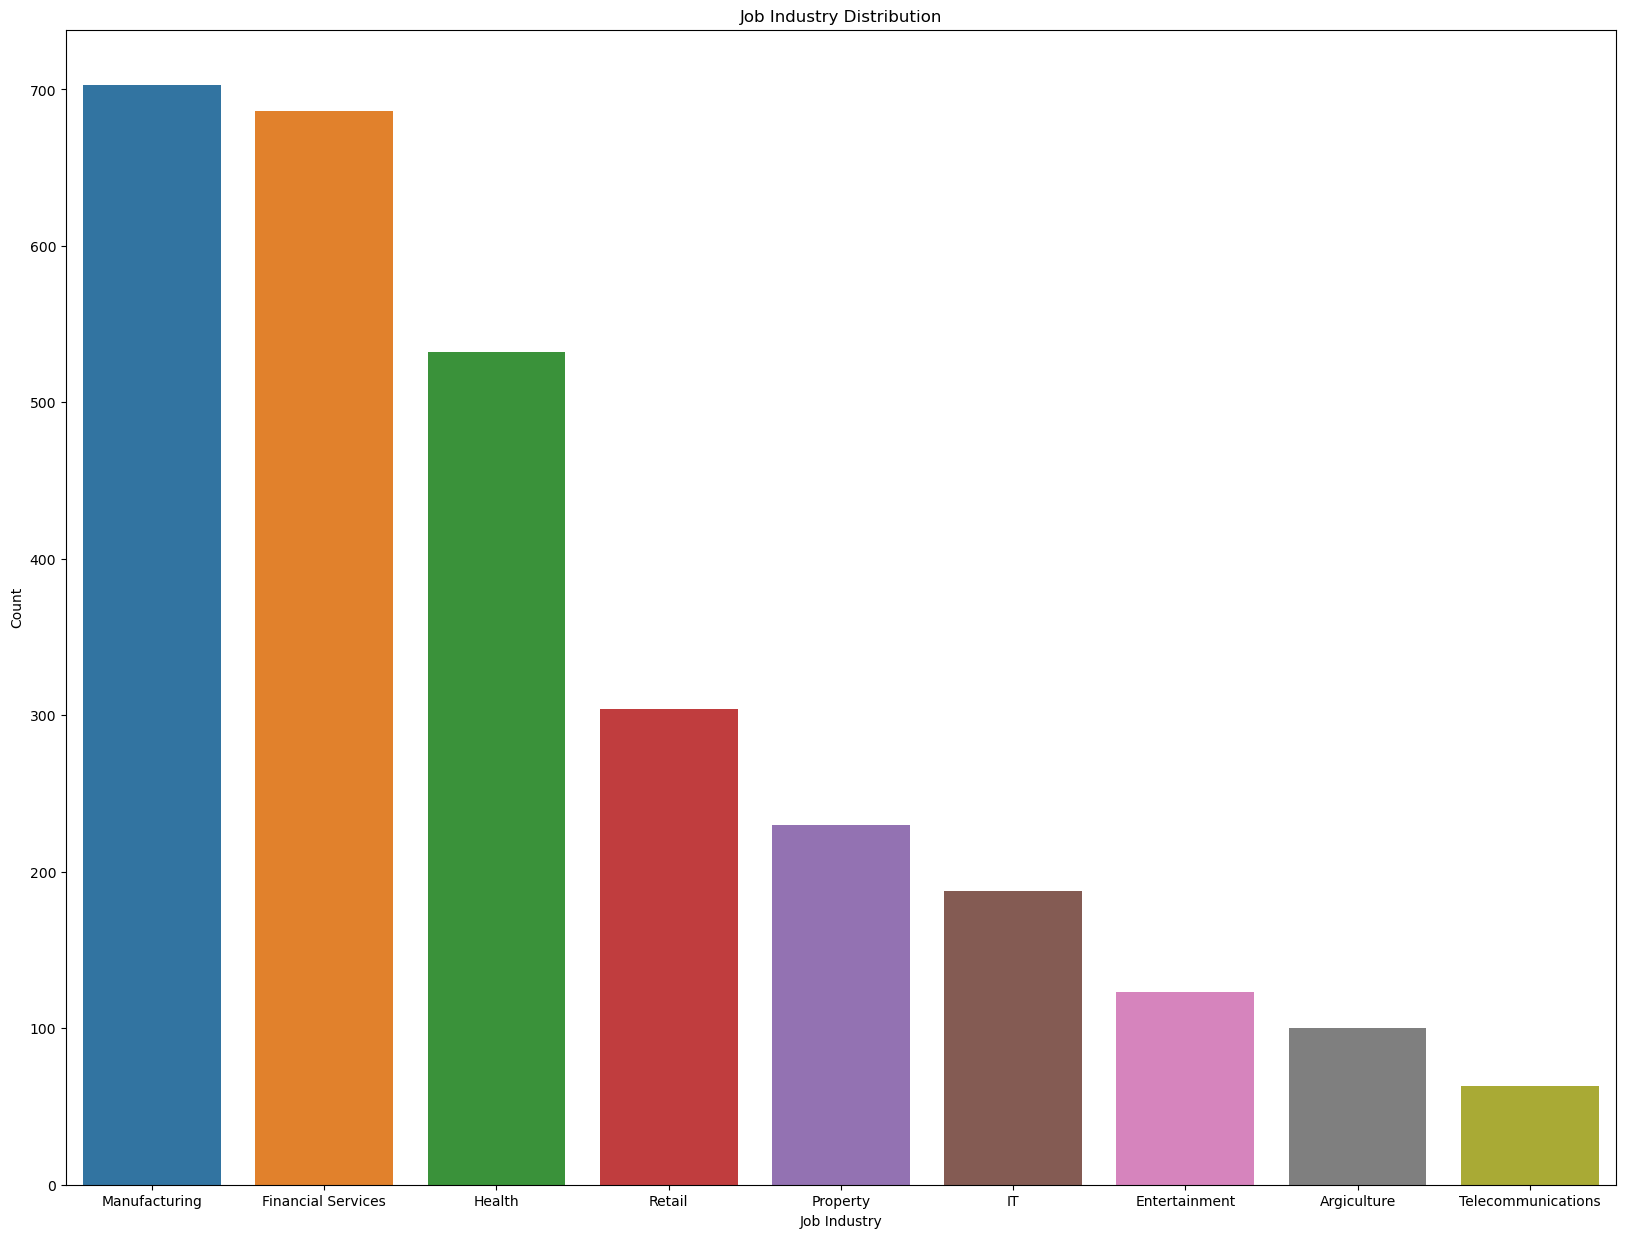

In [162]:
# 1. Histogram for "age" column
plt.figure(figsize=(20, 10))
plt.hist(merged_all_datasets["age"], bins=20, edgecolor='k')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

# Count the number of individuals in each age group
age_group_counts = merged_all_datasets['age_group'].value_counts().sort_index()


# Create a bar chart
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Customers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Show the chart
plt.show()

# 2. Box plot for "past_3_years_bike_related_purchases" column
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_all_datasets["past_3_years_bike_related_purchases"])
plt.xlabel("Past 3 Years Bike Purchases")
plt.title("Box Plot of Past 3 Years Bike Purchases")
plt.show()

# 3. Bar plot for "gender" column
gender_counts = merged_all_datasets["gender"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

# 4. Count plot for "wealth_segment" column
#plt.figure(figsize=(8, 6))
#sns.countplot(x="wealth_segment", data=merged_all_datasets)
#plt.xlabel("Wealth Segment")
#plt.ylabel("Count")
#plt.title("Wealth Segment Distribution")
#plt.xticks(rotation=45)
#plt.show()

# Count the occurrences of each Wealth Segment category
wealth_counts = merged_all_datasets["wealth_segment"].value_counts()
# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(wealth_counts, labels=wealth_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Wealth Segment Distribution')

# Display the pie chart
plt.show()

#Wealth segment distribution based on margin gain
wealth_summary = merged_all_datasets.groupby('wealth_segment')['margin_gain'].sum().reset_index()
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(wealth_summary['margin_gain'], labels=wealth_summary['wealth_segment'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is a circle
plt.title('Wealth Segment Distribution by Margin Gain')
plt.show()

#Gender based on margin gain
wealth_summary = merged_all_datasets.groupby('gender')['margin_gain'].sum().reset_index()
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(wealth_summary['margin_gain'], labels=wealth_summary['gender'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is a circle
plt.title('Gender Distribution by Margin Gain')
plt.show()

# 3. Bar plot for "gender" column
industry_counts = merged_all_datasets["job_industry_category"].value_counts()
plt.figure(figsize=(20, 15))
sns.barplot(x=industry_counts.index, y=industry_counts.values)
plt.xlabel("Job Industry")
plt.ylabel("Count")
plt.title("Job Industry Distribution")
plt.show()

#### Check variables that affect the margin gains using Multiple Linear Regression

In [155]:

# Select the relevant variables for the regression analysis
X = merged_all_datasets[['past_3_years_bike_related_purchases', 'property_valuation']]  # Independent variables (predictors)
y = merged_all_datasets['margin_gain']  # Dependent variable (target)

# Add a constant term to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            margin_gain   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.652
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.192
Time:                        11:24:57   Log-Likelihood:                -31043.
No. Observations:                3489   AIC:                         6.209e+04
Df Residuals:                    3486   BIC:                         6.211e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

##### Select new customers 

In [176]:
# Convert the "DOB" column to a Pandas datetime data type
NewCustomerList["DOB"] = pd.to_datetime(NewCustomerList["DOB"])

# Calculate the current date
current_date = datetime.now()

# Calculate the age by subtracting "dob" from the current date and extracting years
NewCustomerList["age"] = (current_date - NewCustomerList["DOB"]).astype('<m8[Y]')
NewCustomerList.head()


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.49,0.6125,0.765625,0.650781,1,1,1.718750,66.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.40,0.4000,0.500000,0.425000,1,1,1.718750,53.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.61,0.6100,0.610000,0.610000,1,1,1.718750,49.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.59,0.7375,0.737500,0.737500,4,4,1.703125,44.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.50,0.5000,0.625000,0.625000,4,4,1.703125,58.0


In [179]:
selected_rows = NewCustomerList[
    (NewCustomerList['age'].between(40, 49)) & 
    (NewCustomerList['wealth_segment'] == 'Mass Customer') & 
    (NewCustomerList['job_industry_category'].isin(['Manufacturing', 'Financial Services', 'Health'])) & 
    (NewCustomerList['state'] == 'NSW')
]

selected_rows.shape
selected_rows

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,8,7 Nevada Crossing,2620,NSW,Australia,7,0.55,0.5500,0.550000,0.467500,6,6,1.671875,47.0
13,Melba,Spellacy,Female,38,1976-12-09,VP Marketing,Health,Mass Customer,N,No,4,0591 Anzinger Circle,2232,NSW,Australia,10,0.55,0.5500,0.687500,0.584375,14,14,1.593750,46.0
55,Martelle,Tuppeny,Female,52,1981-02-03,Marketing Assistant,Manufacturing,Mass Customer,N,No,9,261 Grayhawk Way,2226,NSW,Australia,10,0.71,0.7100,0.887500,0.754375,54,54,1.381250,42.0
82,Esther,Rooson,Female,14,1981-02-22,NaN,Financial Services,Mass Customer,N,No,5,5186 Main Trail,2046,NSW,Australia,9,1.05,1.0500,1.312500,1.115625,78,78,1.337500,42.0
91,Patricia,Everix,Female,34,1978-02-19,Director of Sales,Health,Mass Customer,N,No,19,91164 Washington Terrace,2263,NSW,Australia,7,1.03,1.0300,1.030000,0.875500,89,89,1.312500,45.0
127,Ricki,Dobrowski,Male,13,1975-03-10,Civil Engineer,Manufacturing,Mass Customer,N,Yes,9,8 Eggendart Pass,2835,NSW,Australia,1,0.63,0.7875,0.787500,0.669375,127,127,1.250000,48.0
138,Daryl,Pauncefort,Female,12,1979-06-18,Community Outreach Specialist,Financial Services,Mass Customer,N,Yes,12,0 Dexter Parkway,2380,NSW,Australia,3,0.66,0.8250,0.825000,0.701250,133,133,1.237500,44.0
165,Robert,Corkill,Male,55,1976-03-12,Clinical Specialist,Health,Mass Customer,N,No,4,5612 Toban Point,2227,NSW,Australia,10,0.85,0.8500,1.062500,0.903125,166,166,1.175000,47.0
183,Harlin,Mazin,Male,34,1974-03-25,Computer Systems Analyst I,Manufacturing,Mass Customer,N,Yes,13,735 Westridge Road,2454,NSW,Australia,7,0.94,1.1750,1.175000,0.998750,181,181,1.158125,49.0
218,Dorian,Stollen,Male,78,1980-02-16,Statistician I,Financial Services,Mass Customer,N,Yes,18,72922 Cambridge Terrace,2026,NSW,Australia,11,0.64,0.8000,1.000000,0.850000,219,219,1.125000,43.0
